# IRIS FLOWER CLASSIFICATION ML PROJECT


IMPORTING THE IMPORTANT LIBRARIES AND IMPORTING THE IRIS CSV FILE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names =['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class'])

## Data Exploration

In [8]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [12]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:>

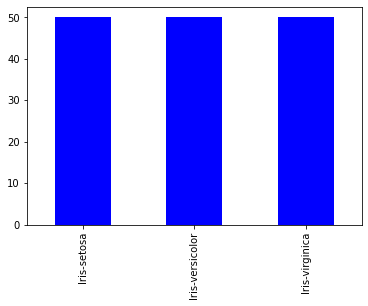

In [13]:
df['class'].value_counts().plot(kind='bar',color='blue')

## LabelEncoding the name of the flowers 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
dfle = df

In [17]:
dfle.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
le = LabelEncoder()

In [22]:
dfle['class'] = le.fit_transform(dfle['class'])

In [23]:
dfle.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df0= dfle[dfle["class"]==0]
df1= dfle[dfle["class"]==1]
df2= dfle[dfle["class"]==2]

In [27]:
df0.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df1.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [29]:
df2.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


# # Data Visualization

Text(0, 0.5, 'petal width in cm')

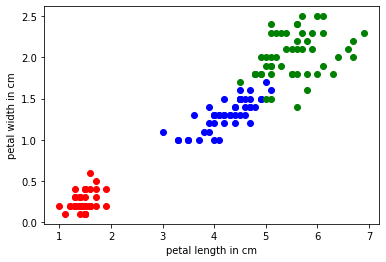

In [30]:
plt.scatter(df0['petal length in cm'],df0['petal width in cm'],color='red')
plt.scatter(df1['petal length in cm'],df1['petal width in cm'],color='blue')
plt.scatter(df2['petal length in cm'],df2['petal width in cm'],color='green')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')

Text(0, 0.5, 'sepal width in cm')

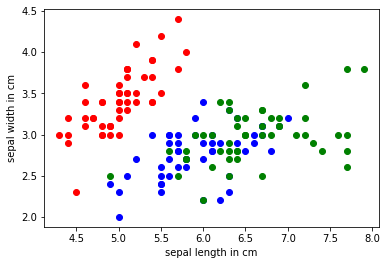

In [31]:
plt.scatter(df0['sepal length in cm'],df0['sepal width in cm'],color='red')
plt.scatter(df1['sepal length in cm'],df1['sepal width in cm'],color='blue')
plt.scatter(df2['sepal length in cm'],df2['sepal width in cm'],color='green')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')

## Importing libraries for classification

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [37]:
X = dfle.drop('class',axis = 1)
y = dfle['class']

In [38]:
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=30)

## Hyperparameter Tuning

In [42]:
model_parmas = {
    'lr':{
        'model':LogisticRegression(),
        'params':{
            'solver':['liblinear','newton-cg','saga'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'C':[10,20,50,100]
        }
    },
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100],
            'criterion':['gini', 'entropy', 'log_loss']
        }
    },
    'dtc':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best', 'random']
            
        }
    },
    'svm':{
        'model':SVC(),
        'params':{
            'C':[10,20,50,100],
            'kernel':['linear','rbf']
        }
    }
    
}

In [47]:
suitable_scores=[]

In [48]:
for model_name,mp in model_parmas.items():
    clf = GridSearchCV(mp['model'],mp['params'],return_train_score = False,cv = 5)
    clf.fit(X,y)
    suitable_scores.append({
        'model_names':model_name,
        'best_score' :clf.best_score_,
        'best_parameter':clf.best_params_,
    })

In [49]:
suitable_scores = pd.DataFrame(suitable_scores,columns=['model_names','best_parameter','best_score'])

In [50]:
suitable_scores

,model_names,best_parameter,best_score
0,lr,"{'C': 10, 'multi_class': 'auto', 'solver': 'sa...",0.980000
1,rf,"{'criterion': 'gini', 'n_estimators': 10}",0.966667
2,dtc,"{'criterion': 'entropy', 'splitter': 'random'}",0.960000
3,svm,"{'C': 10, 'kernel': 'rbf'}",0.980000


In [51]:
#looking at the above result we can conclude that we can use logisticRegression or Svm for classification with the parameters we have recived after hyperparameter tuning

In [56]:
lr_model = LogisticRegression(C=10, multi_class = 'auto', solver= 'saga')
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.9666666666666667

In [57]:
svm_model = SVC(C = 10,kernel='rbf')
svm_model.fit(X_train,y_train)
svm_model.score(X_test,y_test)

0.9666666666666667

In [64]:
dtc_model = DecisionTreeClassifier(criterion='entropy', splitter='random')
dtc_model.fit(X_train,y_train)
dtc_model.score(X_test,y_test)

0.9333333333333333

In [66]:
rf_model =RandomForestClassifier(criterion= 'gini', n_estimators= 10)
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.9333333333333333

In [67]:
lr_model.predict([[5.1,3.5,1.4,0.2]])

array([0], dtype=int64)

In [68]:
svm_model.predict([[5.1,3.5,1.4,0.2]])

array([0], dtype=int64)

## Plotting Confusion Matrix 

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [74]:
def plot_confusion_matrix(model_name):
    y_predicted = model_name.predict(X_test)
    cm = confusion_matrix(y_test,y_predicted)
    sns.heatmap(cm,annot = True)

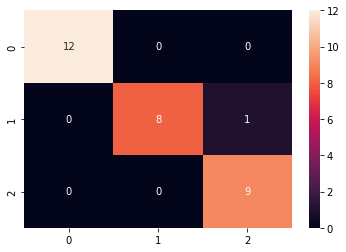

In [75]:
plot_confusion_matrix(lr_model)

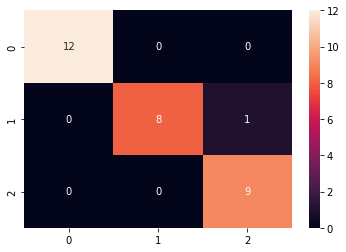

In [76]:
plot_confusion_matrix(svm_model)